In [84]:
import pandas as pd
import paramiko
import os
import numpy as np
import math
import pylab
from math import sqrt
from sklearn.metrics import mean_squared_error

## Remote connection parameters

In [4]:
hostname = "169.229.154.119"
username = "cy290e"
password = ""  # local password 
#local_key_dir = '~/.ssh/known_hosts'
local_key_dir = 'C:/Users/Ruoying/.ssh'
"""SSH connection parameters"""

listings_dir = 'craigslist_census_02202017/'
"""Remote directory for results"""

# estbalish SSH connection
ssh = paramiko.SSHClient() 
ssh.load_host_keys(local_key_dir)
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(hostname,username=username, password=password)
sftp = ssh.open_sftp()

IOError: [Errno 13] Permission denied: 'C:/Users/Ruoying/.ssh'

In [41]:
import pysftp

In [42]:
srv = pysftp.Connection(host="169.229.154.119", username="cy290e", password="")

BadAuthenticationType: ('Bad authentication type', [u'publickey']) (allowed_types=[u'publickey'])

In [26]:
#https://www.example-code.com/python/sftp_use_ppk_putty_private_key.asp
import sys
import chilkat

sftp = chilkat.CkSFtp()
success = sftp.UnlockComponent("Anything for 30-day trial.")
if (success != True):
    print(sftp.lastErrorText())
    sys.exit()

    #  Load a .ppk PuTTY private key.
puttyKey = chilkat.CkSshKey()
ppkText = puttyKey.loadText("C:/Users/Ruoying/.ssh/putty_rsa_private.ppk")

puttyKey.put_Password("")
success = puttyKey.FromPuttyPrivateKey(ppkText)
if (success != True):
    print(puttyKey.lastErrorText())
    sys.exit()

sshHostname = "169.229.154.119"
sshPort = 22
success = sftp.Connect(sshHostname,sshPort)
if (success != True):
    print(sftp.lastErrorText())
    sys.exit()
    
success = sftp.AuthenticatePk("cy290e",puttyKey)
if (success != True):
    print(sftp.lastErrorText())
    sys.exit()

In [17]:
#https://www.example-code.com/python/sftp_use_ppk_putty_private_key.asp
import sys
import chilkat

ssh = chilkat.CkSsh()
success = ssh.UnlockComponent("Anything for 30-day trial.")
if (success != True):
    print(ssh.lastErrorText())
    sys.exit()

    #  Load a .ppk PuTTY private key.
puttyKey = chilkat.CkSshKey()
ppkText = puttyKey.loadText("C:/Users/Ruoying/.ssh/putty_rsa_private.ppk")

puttyKey.put_Password("")
success = puttyKey.FromPuttyPrivateKey(ppkText)
if (success != True):
    print(puttyKey.lastErrorText())
    sys.exit()

sshHostname = "169.229.154.119"
sshPort = 22
success = ssh.Connect(sshHostname,sshPort)
if (success != True):
    print(ssh.lastErrorText())
    sys.exit()
    
success = ssh.AuthenticatePk("cy290e",puttyKey)
if (success != True):
    print(ssh.lastErrorText())
    sys.exit()

In [31]:
# open a file on the server
# After authenticating, the SFTP subsystem must be initialized:
#https://www.example-code.com/python/sftp_downloadFile.asp

success = sftp.InitializeSftp()
if (success != True):
    print(sftp.lastErrorText())
    sys.exit()

In [34]:
newfile = sftp.openFile("craigslist_census_02202017\cl_census_CA.csv","readOnly","openExisting")
#newfile = sftp.openFile("test.py","readOnly","openExisting")

In [37]:
success=sftp.DownloadFile(newfile,"C:/Users/Ruoying/notebook/cp290/local_data/cl_census_CA.csv")


In [40]:
len(newfile)

8

In [7]:
def read_listings_file(fname):
    """Read csv file via SFTP and return as dataframe."""
    with sftp.open(listings_dir+fname) as f:
        df = pd.read_csv(f, delimiter=',', dtype={'date':str,'fips_block':str,'state':str,'mpo_id':str})
        # TODO: parse dates. 
    return df

def filter_outliers(df, rent_range=(100,10000),sqft_range=(10,5000)):
    """Drop outliers from listings dataframe. For now, only need to filter out rent and sq ft. 
    Args: 
        df: Dataframe with listings. Cols names include ['rent','sqft']
        rent_range (tuple): min and max rent
        sqft_range (tuple): min and max sqft
    Returns: 
        DataFrame: listings data without outliers. 
    """
    n0=len(df)
    df=df[(df.rent>=rent_range[0])&(df.rent<rent_range[1])]
    n1=len(df)
    print('Dropped {} outside rent range ${}-${}'.format(n0-n1,rent_range[0],rent_range[1]))
    df=df[(df.sqft>=sqft_range[0])&(df.sqft<sqft_range[1])]
    n2=len(df)
    print('Dropped {} outside sqft range {}-{} sqft. {} rows remaining'.format(n1-n2,sqft_range[0],sqft_range[1],len(df)))
    return(df)

In [14]:
def filter_outliers(df, rent_range=(100,10000),sqft_range=(10,5000)):
    """Drop outliers from listings dataframe. For now, only need to filter out rent and sq ft. 
    Args: 
        df: Dataframe with listings. Cols names include ['rent','sqft']
        rent_range (tuple): min and max rent
        sqft_range (tuple): min and max sqft
    Returns: 
        DataFrame: listings data without outliers. 
    """
    n0=len(df)
    df=df[(df.rent>=rent_range[0])&(df.rent<rent_range[1])]
    n1=len(df)
    print('Dropped {} outside rent range ${}-${}'.format(n0-n1,rent_range[0],rent_range[1]))
    df=df[(df.sqft>=sqft_range[0])&(df.sqft<sqft_range[1])]
    n2=len(df)
    print('Dropped {} outside sqft range {}-{} sqft. {} rows remaining'.format(n1-n2,sqft_range[0],sqft_range[1],len(df)))
    return(df)

## Load data

In [10]:
# get list of files and load. 
# TODO: decide what to load. 
state='NY'
infile='cl_census_{}.csv'.format(state)
df = read_listings_file(infile)
df.head()

AttributeError: type object 'object' has no attribute '__getattr__'

In [2]:
# local data
df = pd.read_csv('C:/Users/Ruoying/notebook/cp290/rental-listings-census/data/cl_census_CA.csv')

In [3]:
df.head()

,listing_id,date,rent,bedrooms,sqft,rent_sqft,fips_block,state,mpo_id,cars_tot,...,race_of_head_4,race_of_head_5,race_of_head_6,race_of_head_7,race_of_head_8,race_of_head_9,recent_mover_0,recent_mover_1,tenure_1,tenure_2
0,5873877617,2016-11-13,925,2,874,1.058352,60470010021060,CA,6197202,4603,...,NaN,8,527,1,198,42,1516,628,1310,834
1,5873876292,2016-11-13,735,0,650,1.130769,60070012001017,CA,6198000,646,...,NaN,NaN,6,1,3,16,371,44,98,317
2,5873889346,2016-11-13,1675,3,1000,1.675000,60790125023017,CA,6199200,1902,...,NaN,NaN,10,NaN,30,21,712,257,477,492
3,5873893871,2016-11-13,1818,2,1084,1.677122,60830020061208,CA,6196600,1058,...,NaN,2,21,1,8,8,427,41,420,48
4,5849643168,2016-11-13,1050,2,1100,0.954545,60890113004008,CA,6198100,786,...,NaN,3,NaN,2,26,23,287,205,202,290


In [4]:
# for census vars, NA really means 0...
census_cols = ['cars_tot', 'children_tot','persons_tot', 'workers_tot', 'age_of_head_med', 'income_med','hhs_tot', 'race_of_head_1', 'race_of_head_2', 'race_of_head_3','race_of_head_4', 'race_of_head_5', 'race_of_head_6', 'race_of_head_7','race_of_head_8', 'race_of_head_9', 'recent_mover_0', 'recent_mover_1','tenure_1', 'tenure_2']
for col in census_cols:
    df[col] = df[col].fillna(0)

In [5]:
df[census_cols].head()

,cars_tot,children_tot,persons_tot,workers_tot,age_of_head_med,income_med,hhs_tot,race_of_head_1,race_of_head_2,race_of_head_3,race_of_head_4,race_of_head_5,race_of_head_6,race_of_head_7,race_of_head_8,race_of_head_9,recent_mover_0,recent_mover_1,tenure_1,tenure_2
0,4603,2790,7775,2978,44,64205,2144,1295,66,7,0,8,527,1,198,42,1516,628,1310,834
1,646,53,645,394,55,21000,415,387,0,2,0,0,6,1,3,16,371,44,98,317
2,1902,598,2307,1183,48,50000,969,899,6,3,0,0,10,0,30,21,712,257,477,492
3,1058,252,1210,516,55,82675,468,414,0,14,0,2,21,1,8,8,427,41,420,48
4,786,398,1385,454,49,39500,492,425,0,13,0,3,0,2,26,23,287,205,202,290


In [6]:
# make meaningful variables.
df['pct_race_1'] = df['race_of_head_1']/df['hhs_tot']
df['pct_race_2'] = df['race_of_head_2']/df['hhs_tot']
df['pct_race_3'] = df['race_of_head_3']/df['hhs_tot']
df['pct_mover'] = df['recent_mover_1']/df['hhs_tot']
df['pct_tenure_1'] = df['tenure_1']/df['hhs_tot']
df['avg_hh_size'] = df['persons_tot']/df['hhs_tot']
df['cars_per_hh'] = df['cars_tot']/df['hhs_tot']


df['ln_rent'] = np.log(df['rent'])

In [7]:
features_to_examine = ['rent','ln_rent', 'bedrooms', 'sqft','pct_race_1','pct_race_2','pct_race_3','pct_mover','pct_tenure_1','income_med','age_of_head_med','avg_hh_size','cars_per_hh']
df[features_to_examine].describe()

,rent,ln_rent,bedrooms,sqft,pct_race_1,pct_race_2,pct_race_3,pct_mover,pct_tenure_1,income_med,age_of_head_med,avg_hh_size,cars_per_hh
count,99983.000000,99983.000000,99983.000000,99983.000000,99873.000000,99873.000000,99873.000000,99873.000000,99873.000000,99983.000000,99983.000000,99873.000000,99873.000000
mean,4146.943140,7.606714,1.855145,1099.243551,0.689928,0.055831,0.004523,0.250387,0.422082,67663.143429,47.536421,2.454458,1.712874
std,295221.312495,0.514716,1.026275,1588.197792,0.208653,0.089254,0.008103,0.144263,0.289548,33404.836031,8.167785,0.650203,0.436757
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1500.000000,7.313220,1.000000,740.000000,0.564815,0.000000,0.000000,0.137255,0.166667,43575.000000,42.000000,1.956522,1.440000
50%,1995.000000,7.598399,2.000000,950.000000,0.727833,0.022613,0.002198,0.244579,0.400000,61600.000000,48.000000,2.410755,1.745501
75%,2685.000000,7.895436,2.000000,1200.000000,0.850420,0.072745,0.005634,0.349929,0.657823,85000.000000,53.000000,2.884972,2.008929
max,83157676.000000,18.236249,9.000000,227510.000000,1.000000,0.973036,0.252294,1.000000,1.000000,421000.000000,79.000000,5.248571,2.917143


## Filter outliers

Can use the following to examine outliers...

In [8]:
rent_range=(100,10000)
sqft_range=(10,5000)
"""Ranges to define outliers in CL data. I defined based on inspection of distributions."""

'Ranges to define outliers in CL data. I defined based on inspection of distributions.'

(0, 10000)

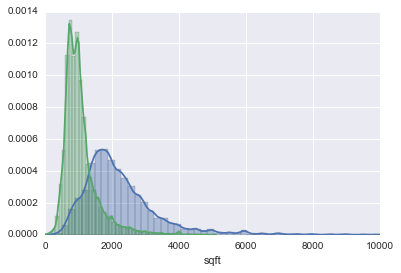

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# use this to define outliers. 
g=sns.distplot(df['rent'],kde='false')
g.set_xlim(0,100000)

g=sns.distplot(df['sqft'],kde='false')
g.set_xlim(0,10000)

In [15]:
df = filter_outliers(df)

Dropped 614 outside rent range $100-$10000
Dropped 161 outside sqft range 10-5000 sqft. 99208 rows remaining


## drop NA

In [16]:
df = df[features_to_examine]
print(len(df))
print(len(df[pd.isnull(df).any(axis=1)]))
df = df.dropna()

99208
110


## look at distributions

Since rent has a more or less logarithmic distribution, we use ln_rent instead

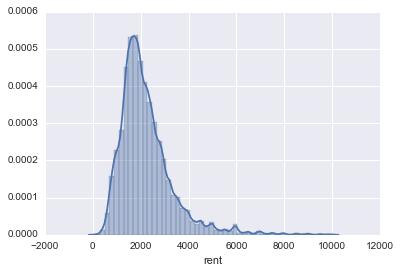

In [17]:
sns.distplot(df.rent)

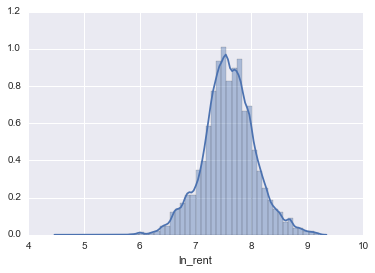

In [18]:
sns.distplot(df.ln_rent)

In [26]:
plot_rows = math.ceil(len(features_to_examine)/2)

f, axes = plt.subplots(plot_rows,2, figsize=(8,12))
sns.despine(left=True)

for i,col in enumerate(features_to_examine):
    row_position = round(i/2)
    col_position = i%2
    p=sns.distplot(df[col], ax=axes[row_position, col_position])
    p.set_title(''.format(col))  # while isn't the subplot title working? 
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

## look at correlations

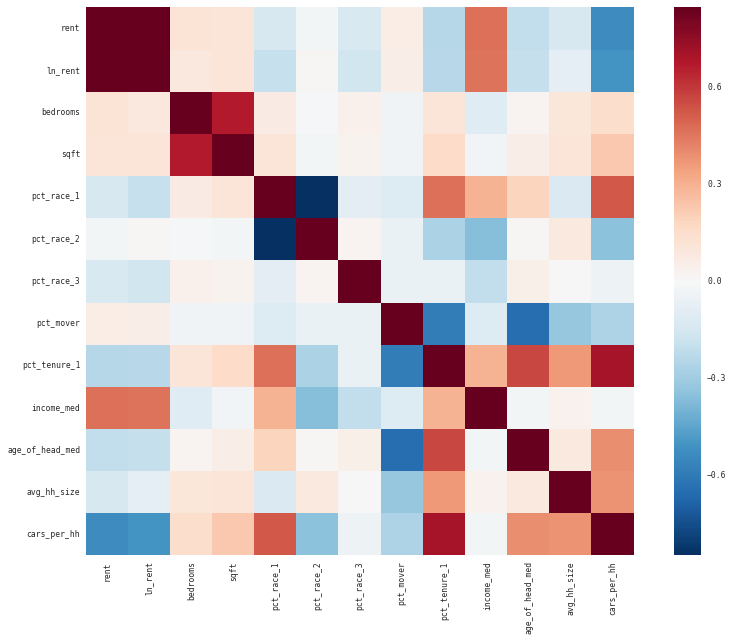

In [45]:
# correlation heatmap
corrmat=df[features_to_examine].corr()
corrmat.head()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [21]:
df.head()

,rent,ln_rent,bedrooms,sqft,pct_race_1,pct_race_2,pct_race_3,pct_mover,pct_tenure_1,income_med,age_of_head_med,avg_hh_size,cars_per_hh
0,925,6.829794,2,874,0.604011,0.030784,0.003265,0.292910,0.611007,64205,44,3.626399,2.146922
1,735,6.599870,0,650,0.932530,0.000000,0.004819,0.106024,0.236145,21000,55,1.554217,1.556627
2,1675,7.423568,3,1000,0.927761,0.006192,0.003096,0.265222,0.492260,50000,48,2.380805,1.962848
3,1818,7.505492,2,1084,0.884615,0.000000,0.029915,0.087607,0.897436,82675,55,2.585470,2.260684
4,1050,6.956545,2,1100,0.863821,0.000000,0.026423,0.416667,0.410569,39500,49,2.815041,1.597561


In [24]:
import statsmodels.api as sm
from patsy import dmatrices

In [25]:
y, X = dmatrices('ln_rent ~ bedrooms+sqft+pct_race_1+pct_race_2+pct_race_3+pct_mover+pct_tenure_1+income_med+cars_per_hh', 
                 data=df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit() 
print res.summary() 

# tenure_1: owner

                            OLS Regression Results                            
Dep. Variable:                ln_rent   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     9827.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        10:13:04   Log-Likelihood:                -33714.
No. Observations:               99098   AIC:                         6.745e+04
Df Residuals:                   99088   BIC:                         6.754e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        7.5936      0.007   1020.176   

random forest generator

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
df.columns.values

array(['rent', 'ln_rent', 'bedrooms', 'sqft', 'pct_race_1', 'pct_race_2',
       'pct_race_3', 'pct_mover', 'pct_tenure_1', 'income_med',
       'age_of_head_med', 'avg_hh_size', 'cars_per_hh'], dtype=object)

In [64]:
cols_all = ['ln_rent','bedrooms', 'sqft','pct_race_1', 'pct_race_2',
       'pct_race_3', 'pct_mover', 'pct_tenure_1', 'income_med',
       'age_of_head_med', 'avg_hh_size', 'cars_per_hh']

cols = ['bedrooms', 'sqft','pct_race_1', 'pct_race_2',
       'pct_race_3', 'pct_mover', 'pct_tenure_1', 'income_med',
       'age_of_head_med', 'avg_hh_size', 'cars_per_hh']

df_val=df[cols_all].values
X_df= df[cols].values
y_df = df['ln_rent'].values

In [65]:
#xx=X_df.as_matrix()
#yy=y_df.as_matrix()

X_df1=np.array(X_df)
y_df1=np.array(y_df)
df_np=np.array(df_val)

In [73]:
X_df2=df_np[:,1:]
print X_df2.shape

(99098L, 11L)


In [74]:
y_df2=df_np[:,:1]
print y_df2.shape

(99098L, 1L)


In [78]:

random_forest = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None)
random_forest.fit(X_df2, y_df2)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
print df_np.shape

(99098L, 12L)


In [59]:
print X_df1.shape

(99098L, 11L)


In [60]:
random_forest = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None)
random_forest.fit(X_df1, y_df1)
#random_forest.fit(X_df, y_df)
#y_test_rf = random_forest.predict(X_test_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

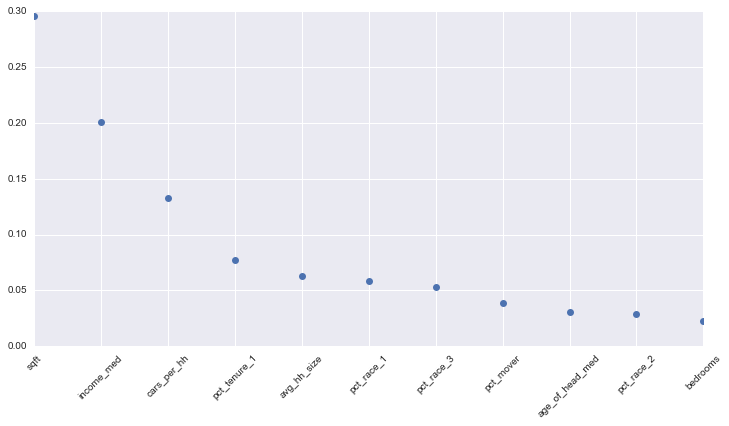

In [61]:
rf_o = pd.DataFrame({'features':cols,'importance':random_forest.feature_importances_})
rf_o= rf_o.sort('importance',ascending=False)
pylab.figure(1,figsize=(12, 6))
pylab.xticks(range(len(rf_o)), rf_o.features,rotation=45)
pylab.plot(range(len(rf_o)),rf_o.importance,"o")

pylab.show()

In [80]:
#RMSE
def RMSE(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

# cross validation 
def cross_val(Traindata, est):
    kf=KFold(len(Traindata),n_folds=10)
    E = np.ones(10)
    i = 0
    for train,test in kf:
        train_data = Traindata[train,:]
        train_data_x = train_data[:,1:]
        train_data_y = train_data[:,:1]
        x = Traindata[test,:]
        test_data_x = x[:,1:]

        real_test_Y = x[:,:1]
        
        #all_predict=[]
        random_forest = RandomForestRegressor(n_estimators=est, criterion='mse', max_depth=None)
        random_forest.fit(train_data_x,train_data_y)
        predict_Y=random_forest.predict(test_data_x)
        error = RMSE(real_test_Y, predict_Y)
        E[i] = error
        i = i + 1
    return np.mean(E)

In [86]:
# find the optimal parameters for random forest prediction  
def opt_est(data):
    
    #initialize est
    est_max=30
    est=20
    est_list = []
    error_list = []
    
    while est<=est_max:
           
        err=cross_val(data,est)
        error_list.append(err)
        est_list.append(est)
        est+=1

    return min(error_list), est_list[[i for i, x in enumerate(error_list) if x == min(error_list)][0]]

In [87]:
print "min RMSE", "   opt #est"
opt_est(df_np)

min RMSE    opt #est


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.18566607643666994, 30)

In [28]:
df1 = pd.read_csv('C:/Users/Ruoying/notebook/cp290/rental-listings-census/data/cl_census_CA.csv')
df1.head()

,listing_id,date,rent,bedrooms,sqft,rent_sqft,fips_block,state,mpo_id,cars_tot,...,race_of_head_4,race_of_head_5,race_of_head_6,race_of_head_7,race_of_head_8,race_of_head_9,recent_mover_0,recent_mover_1,tenure_1,tenure_2
0,5873877617,2016-11-13,925,2,874,1.058352,60470010021060,CA,6197202,4603,...,NaN,8,527,1,198,42,1516,628,1310,834
1,5873876292,2016-11-13,735,0,650,1.130769,60070012001017,CA,6198000,646,...,NaN,NaN,6,1,3,16,371,44,98,317
2,5873889346,2016-11-13,1675,3,1000,1.675000,60790125023017,CA,6199200,1902,...,NaN,NaN,10,NaN,30,21,712,257,477,492
3,5873893871,2016-11-13,1818,2,1084,1.677122,60830020061208,CA,6196600,1058,...,NaN,2,21,1,8,8,427,41,420,48
4,5849643168,2016-11-13,1050,2,1100,0.954545,60890113004008,CA,6198100,786,...,NaN,3,NaN,2,26,23,287,205,202,290


In [35]:
df1.loc['rent']

KeyError: 'the label [rent] is not in the [index]'